## Read inputs

In [16]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from openpyxl import load_workbook

In [31]:
path = "/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx"

In [18]:
tea_lnh3 = pd.read_excel(path, sheet_name='LNH3', decimal=',', index_col=0)
tea_lnh3

,Ref,NH3,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],NaN,682.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg] [],BOG 2020,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reconversion - Efficiency [% LHV],IRENA 2022,NaN,0.98,0.980,0.98,0.980,0.98,0.980,0.98,0.980,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
Reconversion - Electricity consumption opt. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75
Reconversion - Electricity consumption pess. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75


In [19]:
tra_d = pd.read_excel(path, sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [20]:
# Electrcity wholesale price projections in $_2018/MWh from DNVGL 2018
p_electricity = pd.read_excel(path, sheet_name='EL Price', decimal=',', index_col=0)
p_electricity

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Wholesale electricity prices from DNV GL 2019,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,36.301651,36.764515,37.137776,37.447974,37.747898,38.034395,38.325658,38.655501,39.015448,39.420264,...,53.573530,51.487746,50.336783,49.802097,49.984233,50.739234,51.993049,53.655694,54.814324,56.468935
Angola,121.494032,119.445089,119.580409,124.653779,131.547459,137.405324,141.246042,142.819290,143.098086,143.128137,...,167.313461,168.277022,168.972257,169.434972,169.825687,170.198308,170.217476,170.039948,170.172216,169.924801
Argentina,37.961027,38.086072,39.032196,40.033404,41.148255,42.353416,43.577189,44.818521,46.021991,47.209332,...,73.409441,72.994100,72.420411,72.137700,71.884240,71.715794,71.547577,71.579187,70.985088,71.383909
Austria,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Australia,72.846428,69.396730,66.622798,64.898776,64.515503,64.897234,65.154315,65.256396,65.134265,64.811898,...,38.939740,37.412280,35.994851,34.709238,33.678074,32.794352,32.137023,31.647242,30.594356,29.930791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739
Iceland,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Papua New Guinea,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739


In [21]:
# General assumptions
ga = pd.read_excel(path, sheet_name='General Assumptions', decimal=',', index_col=0)
ga

,Value,Ref,Comment
Parameter,,,
WACC [%],0.08,NaN,NaN
NaN,NaN,NaN,NaN
Average exchange rate 2022 [€/$],0.9462,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate 2021 [€/$],0.8458,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate 2020 [€/$],0.877,NaN,NaN
Average exchange rate 2019 [€/$],0.8931,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate 2018 [€/$],0.8475,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate in 2018 [GBP/EUR],1.1301,https://www.exchangerates.org.uk/GBP-EUR-spot-...,NaN
NaN,NaN,NaN,NaN


In [22]:
lcoh_green = pd.read_excel(path, sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


NH3 transport cost

In [23]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i = float(tea_lnh3.loc['Conversion - Discount rate [%]']['NH3'])
i

0.05

## Conversion

In [24]:
# Economic lifetime for the conversion plant [years]
l_con = float(tea_lnh3.loc['Conversion - Lifetime [Years]']['NH3'])
l_con

30.0

In [25]:
# Amortisation factor alpha for the conversion plant
alpha_con = (i * (1 + i) ** l_con) /(((1 + i) ** l_con) - 1)
alpha_con


0.06505143508027657

In [26]:
'not used'# Conversion efficiency [% of LHV]
#eff_con = float(tea_lnh3.loc['Conversion - Efficiency opt. [% of LHV]'][2025])

'not used'

In [27]:
opex_con_share = (tea_lnh3.loc['Conversion - Opex opt. [% of Capex]']['NH3'])
opex_con_share

0.02

Calc. conversion cost

Definition of the cost calculation function for conversion costs. Time relevant variables =
capex [€/tpa]
opex [€/tpa]
electricity use [kwh/kg H2]
electricity price [$/MWh]

In [28]:
def calculate_con_costs():

    result = float((alpha_con * capex_con_y/1000 + opex_con_y/1000) + el_con_y * p_el_y*0.89/1000)

    return result

In [29]:
# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LNH3_Conversion_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_con_y = float(tea_lnh3.loc['Conversion - Capex opt. [€/t/a]'][year])
    opex_con_y = capex_con_y * opex_con_share
    el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
    #eff_con_y = float(tea_lnh3.loc['Conversion - Efficiency opt. [% of LHV]'][year])
    p_el_y = float(p_electricity.loc['Norway'][year])

    # calculate costs of specific year
    result.LNH3_Conversion_costs.loc[year] = calculate_con_costs()

result

,LNH3_Conversion_costs
Years,
2025,0.239551
2026,0.234888
2027,0.231153
2028,0.227106
2029,0.223217
2030,0.219604
2031,0.213191
2032,0.207665
2033,0.203289


In [33]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [34]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'LNH3_Conversion_costs.csv')
result.to_csv(output_file, sep = ';')

Plot conversion costs

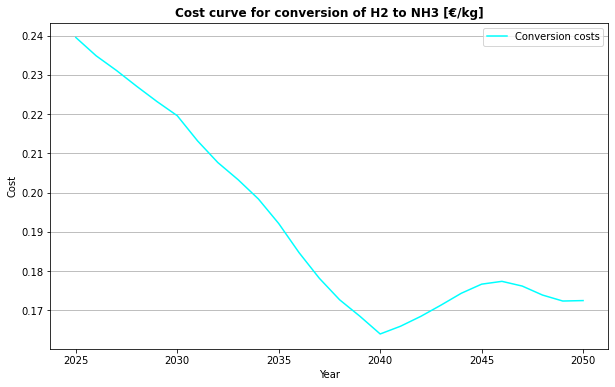

In [35]:
# Plot cost curve for conversion of H2 to NH3
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'cyan', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for conversion of H2 to NH3 [€/kg]', fontweight = 'bold')
plt.legend(['Conversion costs'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

## Export terminal

In [41]:
# Lifetime of import and export terminals
l_ter = float(tea_lnh3.loc['Export Terminal - Technical lifetime [Years]']['NH3'])
# Amortisation factor for the export terminal
alpha_et = (i * (1 + i) ** l_ter) / (((1 + i) ** l_ter) - 1)

In [42]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lnh3.loc['Export Terminal - Electricity use [kWh/kgH2]']['NH3'])
el_et

0.005

In [43]:
# Boil-off hydrogen in [%/day]
bog_et = float(tea_lnh3.loc['Export Terminal - Boil off rate [%/day]']['NH3'])
bog_et

0.0004

In [44]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lnh3.loc['Export Terminal - Storage length per load [Days]']['NH3'])
t_et

7.0

In [45]:
#Lower heating value of Nh3 [kWh/kg]
NH3_lhv =  float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv

5.17

In [46]:
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

In [47]:
# transformed to kWh/kg h2/day
el_reliq = float(tea_lnh3.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq

0.0378

Calc. export terminal cost

Time relevant variables =
capex [€/tpa]
opex [€/tpa]
el_et electricity use [kwh/kg H2]
electricity price [$/MWh]
constant =
boil off in [%/d]
storage time in days
Energy use to reliquefy opt. [kWh/kg NH3/day]

In [48]:
# Definition of the cost calculation function for the Export terminal.

def calculate_export_terminal_costs():
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * (NH3_lhv/H2_lhv) * t_et) * p_el_y * 0.89/1000

    return result

In [49]:
#Calculation of export terminal costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Export_terminal_costs'])
result.index.name = 'Years'

In [50]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(tea_lnh3.loc['Export Terminal - CAPEX for storage tanks [€/t/a]'][year])
    opex_et_y = float(tea_lnh3.loc['Export Terminal - Annual OPEX [€/t/a]'][year])
    p_el_y = float(p_electricity.loc['Norway'][year])


    # calculate costs of specific year
    result.LNH3_Export_terminal_costs.loc[year] = calculate_export_terminal_costs()

result

,LNH3_Export_terminal_costs
Years,
2025,0.074166
2026,0.074144
2027,0.074132
2028,0.074116
2029,0.074102
2030,0.074091
2031,0.074094
2032,0.074106
2033,0.074132


In [51]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [52]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot export terminal costs

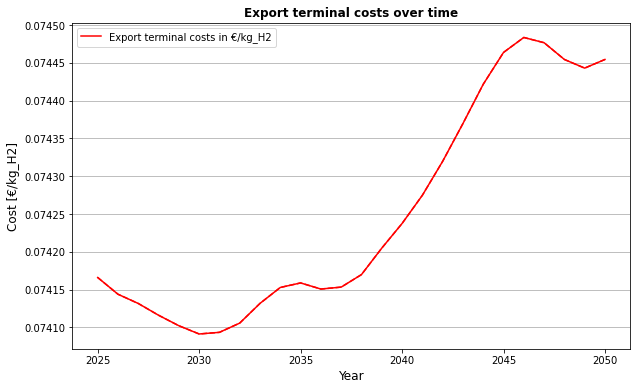

In [53]:
# Plot cost curve for export terminal costs
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Export terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Export terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

## Shipping

In [54]:
# Technical lifetime of ships in years
l_ship = float(tea_lnh3.loc['Shipping - Technical Lifetime [Years]']['NH3'])
l_ship

30.0

In [55]:
# Amortisation factor for shipping
alpha_ship = (i * (1 + i) ** l_ship) / (((1 + i) ** l_ship) - 1)
alpha_ship


0.06505143508027657

In [56]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea


602.403

In [57]:
# Ship speed in [km/h]
v_ship = float(tea_lnh3.loc['Shipping - Ship speed [km/h]']['NH3'])
v_ship

30.0

In [58]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_lnh3.loc['Shipping - Berthing time [hours]']['NH3'])
h_ship


48.0

In [59]:
#Lower heating value of Nh3[ kWh / kg]
NH3_lhv = float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

In [60]:
# Boil-off when shipping in [%_NH3/day] to [%/hour]
bog_ship = float(tea_lnh3.loc['Shipping - Boil off opt. [%/day]']['NH3'])/24 * (NH3_lhv/H2_lhv)
bog_ship

0.0001615786578657866

In [61]:
# Fuel consumption of a ship in [kg_NH3/t_NH3/km]
#f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]']['NH3'])/1000 * (NH3_lhv/H2_lhv)


In [62]:
opex_ship_share = (tea_lnh3.loc['Shipping - Annual OPEX [% of CAPEX]']['NH3'])
opex_ship_share

0.025

In [63]:
# Cost of transported hydrogen in [$/kg_h2] in year y
lcoh_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LCOH_NGR.csv", delimiter=';',
                       decimal=',', index_col=0)
LNH3_Conversion_costs = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Conversion_costs.csv", delimiter=';',
    decimal=',', index_col=0)
LNH3_Export_terminal_costs = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Export_terminal_costs.csv", delimiter=';',
    decimal=',', index_col=0)

In [64]:
# Cost of transported hydrogen carrier in [€/kg_h2] in year y
H2_costs = (lcoh_ngr.loc[::]['LCOH_BLUE']).apply(pd.to_numeric)
Con_costs = (LNH3_Conversion_costs.loc[::]['LNH3_Conversion_costs']).apply(pd.to_numeric)
ET_costs = (LNH3_Export_terminal_costs.loc[::]['LNH3_Export_terminal_costs']).apply(pd.to_numeric)

In [65]:
# €/kg_H2 transported in the form of NH3
LNH3_cargo_cost = (H2_costs + Con_costs + ET_costs).to_frame('LNH3_cargo_cost')
LNH3_cargo_cost

,LNH3_cargo_cost
Years,
2025,2.903538
2026,2.682479
2027,2.461005
2028,2.122874
2029,2.128515
2030,2.133083
2031,2.143801
2032,2.153993
2033,2.163922


In [66]:
#d_sea = 10000

Definition of the cost calculation function for the maritime shipping.
Time relevant variables:
capex [€/t/a]
opex [€/t/a]
lcoh in [€/kg_h2]
static:
alpha [%]
d_sea [km]
v_ship [km/h]
h_ship [h] berthing time
bog_ship [%_H2/day]
f_ship [kg_H2/kg_NH3/km]] Fuel use


In [67]:
def calculate_ship_costs(alpha_ship, capex_ship_y, opex_ship_y, d_sea, v_ship, h_ship, bog_ship, f_ship, LNH3_costs_y):
    result = (alpha_ship * capex_ship_y + opex_ship_y)/(8760/(2*(d_sea/v_ship + h_ship)))\
             /(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))\
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LNH3_costs_y

    return result

In [68]:
# Calculation of shipping costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(tea_lnh3.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
    opex_ship_y = capex_ship_y * opex_ship_share
    f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
    LNH3_costs_y = float(LNH3_cargo_cost.loc[year])

    # calculate costs of specific year
    result.LNH3_Shipping_costs.loc[year] = calculate_ship_costs(alpha_ship=alpha_ship, capex_ship_y=capex_ship_y, opex_ship_y=opex_ship_y, d_sea=d_sea, v_ship=v_ship, h_ship=h_ship, bog_ship=bog_ship, f_ship=f_ship, LNH3_costs_y=LNH3_costs_y)

result

,LNH3_Shipping_costs
Years,
2025,0.014939
2026,0.013927
2027,0.012914
2028,0.011494
2029,0.011272
2030,0.011045
2031,0.01083
2032,0.010613
2033,0.010395


In [69]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [70]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Shipping_costs.csv')
result.to_csv(output_file, sep=';')

Plot shipping costs

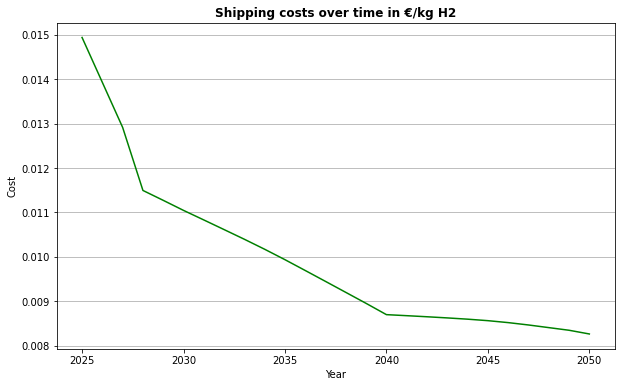

In [71]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Shipping costs over time in €/kg H2', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

## Import terminal

In [72]:
# Definition of variables for the import terminal costs

In [73]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [74]:
# Electricity consumption in kWh/kg H2
el_it = float(tea_lnh3.loc['Import Terminal - Electricity use [kWh/kg H2]']['NH3'])
el_it

0.02

In [75]:
# Import terminal boil-off in [%/day]
bog_it = float(tea_lnh3.loc['Import Terminal - Boil-off [%/day]']['NH3'])
bog_it

0.0004

In [76]:
# Average storage time in the export terminal tanks in days
t_it = float(tea_lnh3.loc['Import Terminal - Storage length per load [days]']['NH3'])
t_it

7.0

Time relevant variables =
capex [€/tpa]
opex [€/tpa]
electricity use [kwh/kg H2]
electricity price [$/MWh] in Germany
lcoh in [€/kg_h2]
constant =
boil off in [%/d]
storage time in [days]



In [77]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs(alpha_it, capex_it_y, opex_it_y, el_it, p_el_y, t_it):
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * p_el_y * 0.89/1000
    return result

In [78]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(tea_lnh3.loc['Import Terminal - CAPEX for storage tanks [€/t/a]'][year])
    opex_it_y = float(tea_lnh3.loc['Import Terminal - Annual OPEX [€/t/a]'][year])
    p_el_y = float(p_electricity.loc['Germany'][year])
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.LNH3_Import_terminal_costs.loc[year] = calculate_import_terminal_costs(alpha_it=alpha_it, capex_it_y=capex_it_y,
                                                              opex_it_y=opex_it_y, el_it=el_it, p_el_y=p_el_y, t_it=t_it)

result

,LNH3_Import_terminal_costs
Years,
2025,0.074793
2026,0.074764
2027,0.074747
2028,0.074727
2029,0.074708
2030,0.074694
2031,0.074697
2032,0.074713
2033,0.074748


In [79]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [80]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')


Plot import terminal costs

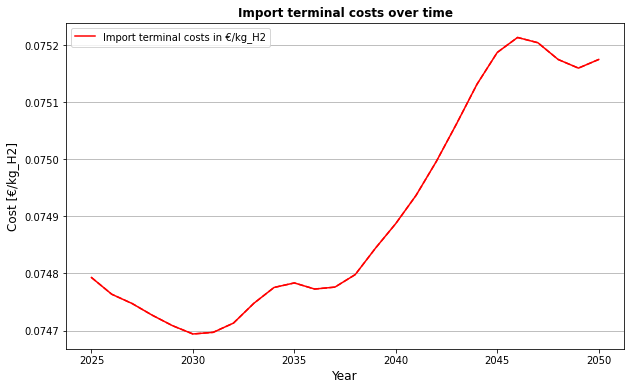

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Import terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Import terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()




## Reconversion

In [82]:
# Economic lifetime for the reconversion plant [years]
l_recon = float(tea_lnh3.loc['Reconversion - Lifetime [Years]']['NH3'])
l_recon

25.0

In [83]:
# Amortisation factor alpha for the conversion plant
alpha_recon = (i * (1 + i) ** l_recon) / (((1 + i) ** l_recon) - 1)
alpha_recon

0.0709524572992296

In [84]:
# Price for electricity in Importing country [$/MWh]
p_el_y = float(p_electricity.loc['Germany'][2025])
p_el_y

46.9570923511

In [85]:
# Electricty consumption for the conversion in [kWh/kg_h2]
el_recon = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][2025])
el_recon

2.375

In [86]:
opex_recon_share = float(tea_lnh3.loc['Reconversion - Annual OPEX opt. [% of CAPEX]']['NH3'])

Calc. reconversion cost
Definition of the cost calculation function for conversion costs.Time relevant variables =
capex[€/tpa]
opex[€/tpa]
electricity use[kwh/kg H2]
electricity price[$/ MWh]

Energy demand for heat in cracking is provided locally

In [87]:
def calculate_recon_costs(alpha_recon, capex_recon_y, opex_recon_y, el_recon_y, p_el_y):
    result = float((alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + (heat_recon_y + el_recon_y) * p_el_y / 1000 * 0.89)
    return result

In [88]:
# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_Reconversion_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, natural gas price and CO2 price of specific year
    capex_recon_y = float(tea_lnh3.loc['Reconversion - Capex opt. [€/t/a]'][year])
    opex_recon_y = capex_recon_y * opex_recon_share
    el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
    p_el_y = float(p_electricity.loc['Germany'][year])

    # calculate costs of specific year
    result.LNH3_Reconversion_costs.loc[year] = calculate_recon_costs(alpha_recon=alpha_recon, capex_recon_y=capex_recon_y,
                                                            opex_recon_y=opex_recon_y, el_recon_y=el_recon_y, p_el_y=p_el_y)
result

,LNH3_Reconversion_costs
Years,
2025,0.689587
2026,0.663738
2027,0.641361
2028,0.618171
2029,0.595743
2030,0.574395
2031,0.556866
2032,0.542021
2033,0.530594


In [89]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [90]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_Reconversion_costs.csv')
result.to_csv(output_file, sep=';')

Plot conversion costs

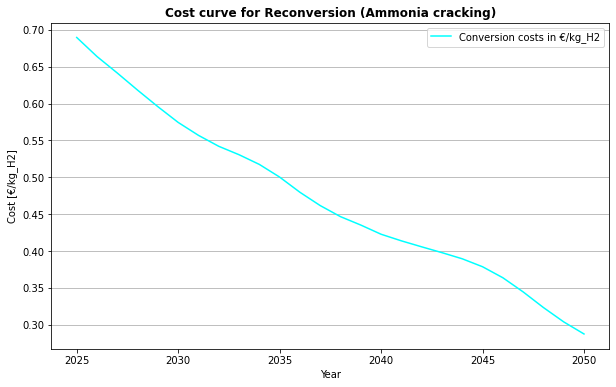

In [91]:
# Plot cost curve for conversion
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(result, color='cyan', linestyle='solid')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.title('Cost curve for Reconversion (Ammonia cracking)', fontweight='bold')
plt.legend(['Conversion costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [€/kg_H2]')
plt.show()

# Total costs for NH3 seaborne transport

In [92]:
con_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Conversion_costs.csv', delimiter=';', decimal=',')
et_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Export_terminal_costs.csv', delimiter=';', decimal=',')
ship_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Shipping_costs.csv', delimiter=';', decimal=',')
it_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Import_terminal_costs.csv', delimiter=';', decimal=',')
recon_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_Reconversion_costs.csv', delimiter=';', decimal=',')

In [93]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LNH3_transport_costs'])
result.index.name = 'Years'

In [94]:
# Calculate total transport costs from conversion costs (LC), export terminal costs (EC), Shipping costs (SC), import terminal costs (IC)
def calculate_seaborne_transport_costs(LC,EC,SC,IC,RC):
    result = LC + EC + SC + IC + RC

    return result

In [95]:
for year in years:
    # get all costs
    LC = float(con_costs[con_costs.Years == year]['LNH3_Conversion_costs'])
    EC = float(et_costs[et_costs.Years == year]['LNH3_Export_terminal_costs'])
    SC = float(ship_costs[ship_costs.Years == year]['LNH3_Shipping_costs'])
    IC = float(it_costs[it_costs.Years == year]['LNH3_Import_terminal_costs'])
    RC = float(recon_costs[recon_costs.Years == year]['LNH3_Reconversion_costs'])

    # calculate costs of specific year
    result.LNH3_transport_costs.loc[year] = calculate_seaborne_transport_costs(LC=LC,EC=EC, SC=SC, IC=IC, RC=RC)

result

,LNH3_transport_costs
Years,
2025,1.093036
2026,1.061461
2027,1.034307
2028,1.005614
2029,0.979042
2030,0.95383
2031,0.929677
2032,0.909118
2033,0.893157


In [96]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [97]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LNH3_transport_costs.csv')
result.to_csv(output_file, sep=';')

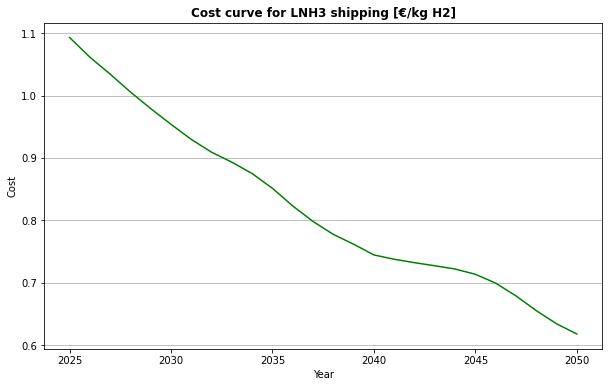

In [98]:
# Plot cost curve for LNH3 transport
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for LNH3 shipping [€/kg H2]', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

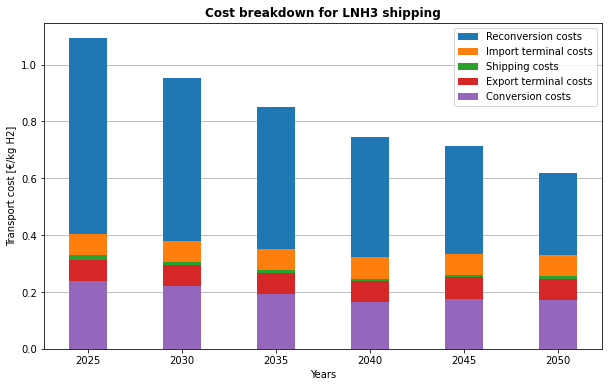

In [99]:
# Cost breakdown for LH2 shipping
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
LC = (con_costs.loc[::5]['LNH3_Conversion_costs']).apply(pd.to_numeric)
EC = (et_costs.loc[::5]['LNH3_Export_terminal_costs']).apply(pd.to_numeric)
SC = (ship_costs.loc[::5]['LNH3_Shipping_costs']).apply(pd.to_numeric)
IC = (it_costs.loc[::5]['LNH3_Import_terminal_costs']).apply(pd.to_numeric)
RC = recon_costs.loc[::5]['LNH3_Reconversion_costs'].apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RC_plt = plt.bar(x, RC, width, label='Reconversion costs', bottom= LC + EC + SC + IC)
IC_plt = plt.bar(x,IC, width, label='Import terminal costs', bottom= LC + EC + SC)
SC_plt = plt.bar(x,SC, width, label='Shipping costs', bottom= LC + EC)
EC_plt = plt.bar(x,EC, width, label='Export terminal costs', bottom= LC)
LC_plt = plt.bar(x,LC, width, label='Conversion costs')

plt.title('Cost breakdown for LNH3 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport cost [€/kg H2]')
plt.xlabel('Years')
plt.show()

Higher import terminal costs because of longer storage time in tanks: IC = 20 days, EC = 3 days
